In [ ]:
import sys
import nltk
from nltk.stem.porter import *
from sklearn.feature_extraction import stop_words
import xml.etree.cElementTree as ET
from collections import Counter
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import zipfile
import os
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud
PARTIALS = False

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
def tokenize(text):
    """
    Tokenize text and return a non-unique list of tokenized words
    found in the text. Normalize to lowercase, strip punctuation,
    remove stop words, drop words of length < 3, strip digits.
    """
    text = text.lower()
    text = re.sub('[' + string.punctuation + '0-9\\r\\t\\n]', ' ', text)
    tokens = nltk.word_tokenize(text)
    tokens = [w for w in tokens if len(w) > 2]  # ignore a, an, to, at, be, ...
    goodWords = [w for w in tokens if w not in ENGLISH_STOP_WORDS]
    return(goodWords)


def stemwords(words):
    """
    Given a list of tokens/words, return a new list with each word
    stemmed using a PorterStemmer.
    """
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(w) for w in words]
    return stemmed

In [ ]:
path='/Users/sakshisingla/Documents/GitHub/Practicum_Repo/GSB_practicum/Parsed_10Ks/10K_parsed'

In [ ]:
files=os.listdir(path)

In [ ]:
total_stemmed=[]

In [ ]:
for i in range(10,20):
    path='/Users/sakshisingla/Documents/GitHub/Practicum_Repo/GSB_practicum/Parsed_10Ks/10K_parsed/'+str(i)+'_year_10Ks/'
    files=os.listdir(path)
    stemmed_year=[]
    for file in files:
        infile = open(path+file,"r")
        text = infile.read()
        stemmed = stemwords(tokenize(text))
        stemmed_year.append(stemmed)
    total_stemmed.append(stemmed_year)    
    print("year stemmed:",i)

In [35]:
year_2010_stemmed=total_stemmed[0]
year_2011_stemmed=total_stemmed[1]
year_2012_stemmed=total_stemmed[2]
year_2013_stemmed=total_stemmed[3]
year_2014_stemmed=total_stemmed[4]
year_2015_stemmed=total_stemmed[5]
year_2016_stemmed=total_stemmed[6]
year_2017_stemmed=total_stemmed[7]
year_2018_stemmed=total_stemmed[8]
year_2019_stemmed=total_stemmed[9]


In [37]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [39]:
year_2010_stemmed_flat=flatten(year_2010_stemmed)
year_2011_stemmed_flat=flatten(year_2011_stemmed)
year_2012_stemmed_flat=flatten(year_2012_stemmed)
year_2013_stemmed_flat=flatten(year_2013_stemmed)
year_2014_stemmed_flat=flatten(year_2014_stemmed)
year_2015_stemmed_flat=flatten(year_2015_stemmed)
year_2016_stemmed_flat=flatten(year_2016_stemmed)
year_2017_stemmed_flat=flatten(year_2017_stemmed)
year_2018_stemmed_flat=flatten(year_2018_stemmed)
year_2019_stemmed_flat=flatten(year_2019_stemmed)

In [40]:
tokenCtr_year_2010=Counter(year_2010_stemmed_flat)
tokenCtr_year_2011=Counter(year_2011_stemmed_flat)
tokenCtr_year_2012=Counter(year_2012_stemmed_flat)
tokenCtr_year_2013=Counter(year_2013_stemmed_flat)
tokenCtr_year_2014=Counter(year_2014_stemmed_flat)
tokenCtr_year_2015=Counter(year_2015_stemmed_flat)
tokenCtr_year_2016=Counter(year_2016_stemmed_flat)
tokenCtr_year_2017=Counter(year_2017_stemmed_flat)
tokenCtr_year_2018=Counter(year_2018_stemmed_flat)
tokenCtr_year_2019=Counter(year_2019_stemmed_flat)

In [41]:

for item in tokenCtr_year_2010.most_common(10):
    print("%s %d"%(item[0] ,item[1]))

million 140601
oper 100092
financi 97402
compani 94097
includ 90113
year 75087
asset 74262
valu 73096
rate 72975
decemb 72061


In [42]:
%load_ext rpy2.ipython
%R library(ggplot2)

array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

# Average total words per year

In [44]:
def average_words(listWords):
    lenFiles=len(listWords)
    countWords=0
    for subList in listWords:
        countWords=countWords+len(subList)
    return countWords/lenFiles    

In [45]:
average_words_2010=average_words(year_2010_stemmed)
average_words_2011=average_words(year_2011_stemmed)
average_words_2012=average_words(year_2012_stemmed)
average_words_2013=average_words(year_2013_stemmed)
average_words_2014=average_words(year_2014_stemmed)
average_words_2015=average_words(year_2015_stemmed)
average_words_2016=average_words(year_2016_stemmed)
average_words_2017=average_words(year_2017_stemmed)
average_words_2018=average_words(year_2018_stemmed)
average_words_2019=average_words(year_2019_stemmed)

In [53]:
d = {'2010': average_words_2010,
    '2011': average_words_2011,
    '2012': average_words_2012,
    '2013': average_words_2013,
    '2014': average_words_2014,
    '2015': average_words_2015,
    '2016': average_words_2016,
    '2017': average_words_2017,
    '2018': average_words_2018,
    '2019': average_words_2019}

In [52]:
keyArray=[]
valueArray=[]
for key in d:
    keyArray.append(key)
    valueArray.append(d[key])

In [62]:
data = {'year': keyArray, 'averageWords': valueArray}
df=pd.DataFrame.from_dict(data)

In [63]:
%R -i df

In [ ]:
%%R
ggplot(data=df, aes(x = year, y = averageWords, color = "#8c1516", group=1)) + geom_line()+geom_point()

# Average Tokens per year (without repetition)

In [69]:
tokens_2010=set(year_2010_stemmed_flat)
tokens_2011=set(year_2011_stemmed_flat)
tokens_2012=set(year_2012_stemmed_flat)
tokens_2013=set(year_2013_stemmed_flat)
tokens_2014=set(year_2014_stemmed_flat)
tokens_2015=set(year_2015_stemmed_flat)
tokens_2016=set(year_2016_stemmed_flat)
tokens_2017=set(year_2017_stemmed_flat)
tokens_2018=set(year_2018_stemmed_flat)
tokens_2019=set(year_2019_stemmed_flat)

In [70]:
keyArray

['2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [74]:
def average_tokens(listWords):
    lenFiles=len(listWords)
    diffTokens=set(flatten(listWords))
    countTokens=len(diffTokens)

    return countTokens/lenFiles 

In [75]:
average_tokens_2010=average_tokens(year_2010_stemmed)
average_tokens_2011=average_tokens(year_2011_stemmed)
average_tokens_2012=average_tokens(year_2012_stemmed)
average_tokens_2013=average_tokens(year_2013_stemmed)
average_tokens_2014=average_tokens(year_2014_stemmed)
average_tokens_2015=average_tokens(year_2015_stemmed)
average_tokens_2016=average_tokens(year_2016_stemmed)
average_tokens_2017=average_tokens(year_2017_stemmed)
average_tokens_2018=average_tokens(year_2018_stemmed)
average_tokens_2019=average_tokens(year_2019_stemmed)

In [76]:
valueArray=[average_tokens_2010,average_tokens_2011,average_tokens_2012,average_tokens_2013,average_tokens_2014,
            average_tokens_2015,average_tokens_2016,average_tokens_2017,average_tokens_2018,average_tokens_2019]

In [79]:
data = {'year': keyArray, 'averageTokens': valueArray}
df_tokens=pd.DataFrame.from_dict(data)

In [83]:
df_tokens

,year,averageTokens
0,2010,131.223982
1,2011,137.706013
2,2012,153.013216
3,2013,163.496760
4,2014,164.688559
5,2015,163.625780
6,2016,163.196687
7,2017,165.803279
8,2018,170.864097
9,2019,184.458140


In [80]:
%R -i df_tokens

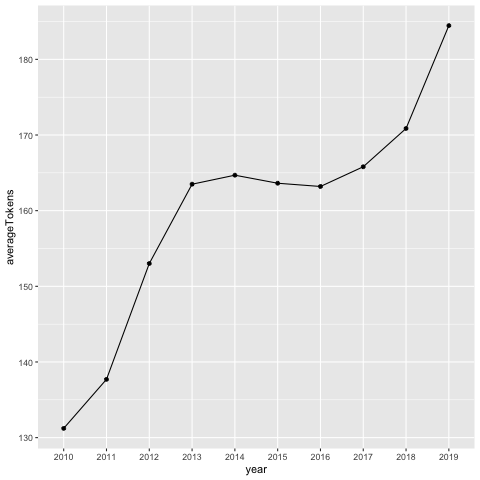

In [82]:
%%R
ggplot(data=df_tokens, aes(x = year, y = averageTokens, group=1)) + geom_line()+geom_point()

# WordClouds for various years

### year 2010

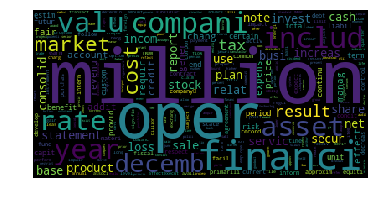

In [84]:
wordcloud = WordCloud(
                      max_words=500,
                      random_state=1,
                      relative_scaling=0.25)

wordcloud.fit_words(tokenCtr_year_2010)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### year 2011

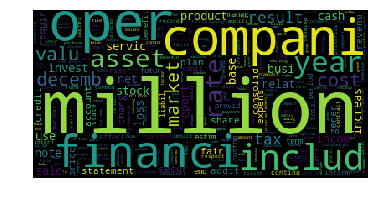

In [104]:
wordcloud.fit_words(tokenCtr_year_2011)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### year 2012

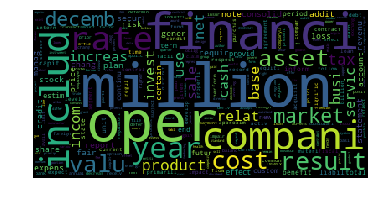

In [95]:
wordcloud.fit_words(tokenCtr_year_2012)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### year 2013

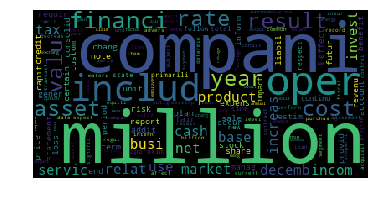

In [96]:
wordcloud.fit_words(tokenCtr_year_2013)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### year 2014

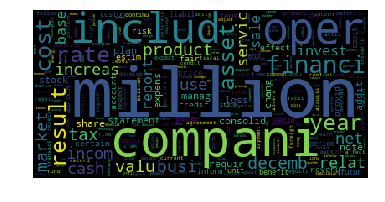

In [97]:
wordcloud.fit_words(tokenCtr_year_2014)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### year 2015

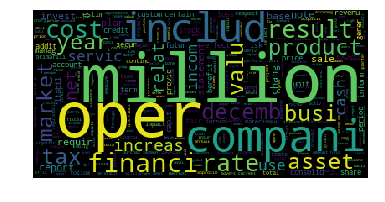

In [98]:
wordcloud.fit_words(tokenCtr_year_2015)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### year 2016

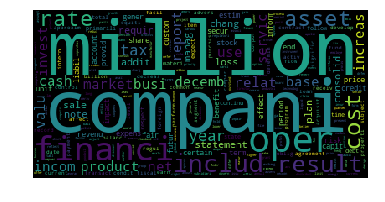

In [100]:
wordcloud.fit_words(tokenCtr_year_2016)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### year 2017

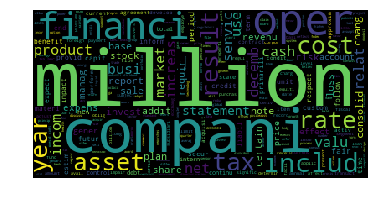

In [101]:
wordcloud.fit_words(tokenCtr_year_2017)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### year 2018

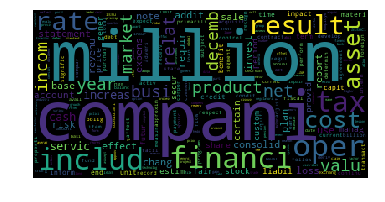

In [102]:
wordcloud.fit_words(tokenCtr_year_2018)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### year 2019

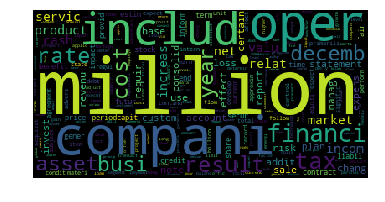

In [103]:
wordcloud.fit_words(tokenCtr_year_2019)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# TFIDF calculations

In [7]:
path = '/Users/sakshisingla/Documents/GitHub/Practicum_Repo/GSB_practicum/10K_yearwise/'

In [8]:
files=os.listdir(path)

In [9]:
files

['whole_10K_2018.txt',
 'whole_10K_2019.txt',
 'whole_10K_2012.txt',
 'whole_10K_2013.txt',
 'whole_10K_2011.txt',
 'whole_10K_2010.txt',
 'whole_10K_2014.txt',
 'whole_10K_2015.txt',
 'whole_10K_2017.txt',
 'whole_10K_2016.txt']

In [10]:
corpus=dict()
for file in files:
    infile = open(path+file,"r")
    text = infile.read()
    corpus.update({file:text})
    

In [11]:
def tokenize(text):
    """
    Tokenize text and return a non-unique list of tokenized words
    found in the text. Normalize to lowercase, strip punctuation,
    remove stop words, drop words of length < 3, strip digits.
    """
    text = text.lower()
    text = re.sub('[' + string.punctuation + '0-9\\r\\t\\n]', ' ', text)
    tokens = nltk.word_tokenize(text)
    tokens = [w for w in tokens if len(w) > 2]  # ignore a, an, to, at, be, ...
    goodWords = [w for w in tokens if w not in ENGLISH_STOP_WORDS]
    return(goodWords)


def stemwords(words):
    """
    Given a list of tokens/words, return a new list with each word
    stemmed using a PorterStemmer.
    """
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(w) for w in words]
    return stemmed

def tokenizer(text):
    return stemwords(tokenize(text))

In [12]:
def compute_tfidf(corpus):
    """
    Create and return a TfidfVectorizer object after training it on
    the list of articles pulled from the corpus dictionary. Meaning,
    call fit() on the list of document strings, which figures out
    all the inverse document frequencies (IDF) for use later by
    the transform() function. The corpus argument is a dictionary 
    mapping file name to xml text.
    """

    tfidf = TfidfVectorizer(input='content',
                        analyzer='word',
                        tokenizer=tokenizer,
                        stop_words='english',
                        decode_error = 'ignore')
    list_of_articles=[]
    for key in corpus:
        list_of_articles.append(corpus[key])      
    tfidf_matrix=tfidf.fit(list_of_articles)  
    return tfidf_matrix 

In [13]:
tfidf=compute_tfidf(corpus)

In [14]:
def summarize(tfidf, text, n):
    """
    Given a trained TfidfVectorizer object and some XML text, return
    up to n (word,score) pairs in a list. Discard any terms with
    scores < 0.09.
    """
    tmatrix=tfidf.transform([text])
    retTuple=[]
    feature_index=tmatrix.nonzero()[1]
    feature_words=tfidf.get_feature_names()
    for i in feature_index:
        retTuple.append((feature_words[i],tmatrix[0,i]))

    def Sort_Tuple(tup):  
        return(sorted(tup, key = lambda x: x[1],reverse = True))
    
    sorted_list=Sort_Tuple(retTuple)
    sortedlistn=(sorted_list[:n])
    sortedlistnFinal=[i for i in sortedlistn if i[1] >= 0.09]
    return(sortedlistnFinal)

In [15]:
n=50
key='whole_10K_2018.txt'
Text_10K_18=corpus[key]
tfidf_scores=summarize(tfidf, Text_10K_18, n)

# for item in tfidf_scores:
#     print("%s %.3f"%(item[0] ,item[1]))

million 0.223
compani 0.212
oper 0.194
financi 0.190
includ 0.188
tax 0.175
result 0.141
rate 0.135
cost 0.135
asset 0.134
year 0.131
product 0.128
busi 0.126
decemb 0.123
valu 0.122
market 0.119
relat 0.118
incom 0.114
net 0.110
increas 0.109
cash 0.104
servic 0.102
statement 0.098
use 0.097
chang 0.096
report 0.093
base 0.093
requir 0.093
consolid 0.092
invest 0.091


In [16]:
tfidf_scores

[('million', 0.22298541096405397),
 ('compani', 0.21195677338890717),
 ('oper', 0.19444179364714054),
 ('financi', 0.1896597788690794),
 ('includ', 0.18817661193112317),
 ('tax', 0.17500751237252338),
 ('result', 0.14114367162853028),
 ('rate', 0.13511666270546938),
 ('cost', 0.13450112522756888),
 ('asset', 0.13408354955160626),
 ('year', 0.1314930337840602),
 ('product', 0.1284107066648248),
 ('busi', 0.1262424063029743),
 ('decemb', 0.12267909386809303),
 ('valu', 0.12243628134540364),
 ('market', 0.11868428656805037),
 ('relat', 0.11785532152243564),
 ('incom', 0.11448842431291457),
 ('net', 0.10973888764298387),
 ('increas', 0.1090970583632635),
 ('cash', 0.10382013908035774),
 ('servic', 0.10168122367348241),
 ('statement', 0.09785653979698009),
 ('use', 0.09671980601241509),
 ('chang', 0.0955830722278501),
 ('report', 0.09307452501891894),
 ('base', 0.09303740718105559),
 ('requir', 0.09298946330714877),
 ('consolid', 0.09201357348665828),
 ('invest', 0.09083508213449704)]

In [18]:
dict_18={}

In [19]:
for item in tfidf_scores:
    dict_18.update( {item[0] :item[1]} )

In [20]:
dict_18

{'million': 0.22298541096405397,
 'compani': 0.21195677338890717,
 'oper': 0.19444179364714054,
 'financi': 0.1896597788690794,
 'includ': 0.18817661193112317,
 'tax': 0.17500751237252338,
 'result': 0.14114367162853028,
 'rate': 0.13511666270546938,
 'cost': 0.13450112522756888,
 'asset': 0.13408354955160626,
 'year': 0.1314930337840602,
 'product': 0.1284107066648248,
 'busi': 0.1262424063029743,
 'decemb': 0.12267909386809303,
 'valu': 0.12243628134540364,
 'market': 0.11868428656805037,
 'relat': 0.11785532152243564,
 'incom': 0.11448842431291457,
 'net': 0.10973888764298387,
 'increas': 0.1090970583632635,
 'cash': 0.10382013908035774,
 'servic': 0.10168122367348241,
 'statement': 0.09785653979698009,
 'use': 0.09671980601241509,
 'chang': 0.0955830722278501,
 'report': 0.09307452501891894,
 'base': 0.09303740718105559,
 'requir': 0.09298946330714877,
 'consolid': 0.09201357348665828,
 'invest': 0.09083508213449704}

### 2018_tfidf_wordcloud

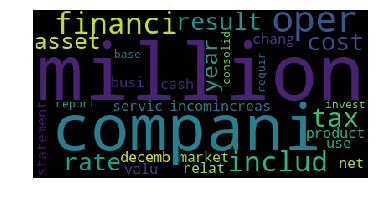

In [21]:
wordcloud = WordCloud(
                      max_words=500,
                      random_state=1,
                      relative_scaling=0.25)

wordcloud.fit_words(dict_18)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 2010_tfidf_wordcloud

In [24]:
n=50
key='whole_10K_2010.txt'
Text_10K_10=corpus[key]
tfidf_scores=summarize(tfidf, Text_10K_10, n)
dict_10={}
for item in tfidf_scores:
    dict_10.update( {item[0] :item[1]} )

In [27]:
dict_10

{'million': 0.2632259090268967,
 'oper': 0.18738705760499672,
 'financi': 0.18235097894778693,
 'compani': 0.17616352914775782,
 'includ': 0.16870489072012815,
 'year': 0.14057399187134223,
 'asset': 0.1390294696065846,
 'valu': 0.1368465448057271,
 'rate': 0.13662001487356268,
 'decemb': 0.13490887141903116,
 'market': 0.13189471281750412,
 'cost': 0.13150905028836463,
 'result': 0.1276823793681651,
 'tax': 0.1264542501491578,
 'product': 0.1224946567067791,
 'net': 0.11773191168672643,
 'incom': 0.11332674697281767,
 'relat': 0.11278382399490286,
 'busi': 0.1087493446245359,
 'stock': 0.10432358628043037,
 'increas': 0.10366459011413377,
 'cash': 0.10343431588556991,
 'invest': 0.10008504275629544,
 'servic': 0.09923883177002822,
 'sale': 0.09841321441395777,
 'statement': 0.09632951346768473,
 'report': 0.09554695552020753,
 'loss': 0.09444051593418114,
 'use': 0.0937384603592913,
 'plan': 0.09231562772751456,
 'secur': 0.09108375421210786,
 'base': 0.09057827419818718,
 'share': 0.

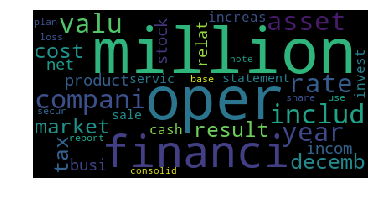

In [26]:
wordcloud.fit_words(dict_10)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 2011_tfidf_wordcloud

In [29]:
n=50
key='whole_10K_2011.txt'
Text_10K_11=corpus[key]
tfidf_scores=summarize(tfidf, Text_10K_11, n)
dict_11={}
for item in tfidf_scores:
    dict_11.update( {item[0] :item[1]} )

In [31]:
dict_11

{'million': 0.2610781277487644,
 'oper': 0.18949733481732214,
 'compani': 0.17587362614150454,
 'financi': 0.17579973117448397,
 'includ': 0.1717228917744708,
 'year': 0.14220635824042335,
 'asset': 0.1381331234729478,
 'rate': 0.13735091821229098,
 'decemb': 0.13670568898806254,
 'valu': 0.13349936834587714,
 'cost': 0.12998485162172788,
 'market': 0.12907468190598664,
 'result': 0.12815730292517025,
 'tax': 0.12733544670659996,
 'product': 0.12324058414389887,
 'net': 0.11940705744017296,
 'incom': 0.11430650239948455,
 'relat': 0.11317825241521919,
 'busi': 0.1102260583669338,
 'increas': 0.10925460989805358,
 'cash': 0.10361876692553318,
 'servic': 0.1003385513163272,
 'invest': 0.10029890035841373,
 'stock': 0.10004657608078249,
 'sale': 0.09698263842383184,
 'loss': 0.09659874505857861,
 'report': 0.09534973988430404,
 'use': 0.09388986370658049,
 'note': 0.09217946556749451,
 'base': 0.0919541760338952,
 'statement': 0.09181900231373562,
 'secur': 0.09076644961275963}

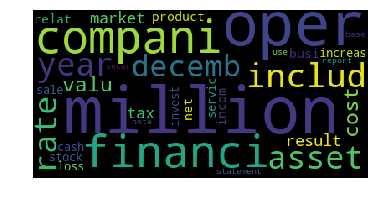

In [30]:
wordcloud.fit_words(dict_11)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 2012_tfidf_wordcloud

In [33]:
n=50
key='whole_10K_2012.txt'
Text_10K_12=corpus[key]
tfidf_scores=summarize(tfidf, Text_10K_12, n)
dict_12={}
for item in tfidf_scores:
    dict_12.update( {item[0] :item[1]} )

In [34]:
dict_12

{'million': 0.25214288224931725,
 'oper': 0.19230828285452484,
 'financi': 0.18044972813028964,
 'compani': 0.17967051380702848,
 'includ': 0.17905076660108588,
 'rate': 0.13790643820656265,
 'year': 0.1372305150842919,
 'result': 0.1339415057895965,
 'cost': 0.13265670821938214,
 'asset': 0.13218011899375962,
 'valu': 0.1319010515384521,
 'market': 0.13073041792722717,
 'decemb': 0.129447432483346,
 'product': 0.12784188855216133,
 'tax': 0.12569995522635968,
 'increas': 0.11933395541794921,
 'busi': 0.11658133551787078,
 'relat': 0.11460249356205403,
 'incom': 0.11113589588670839,
 'net': 0.11055782758642858,
 'servic': 0.1051268849659315,
 'cash': 0.10100429755797993,
 'invest': 0.0973057477119891,
 'use': 0.0961496111114295,
 'sale': 0.09456943694890917,
 'base': 0.09421607231394188,
 'report': 0.09342779735901488,
 'loss': 0.09167909544751016,
 'statement': 0.09159573763618455,
 'stock': 0.0911354575475605,
 'requir': 0.09074041400693042,
 'plan': 0.09073678975426408}

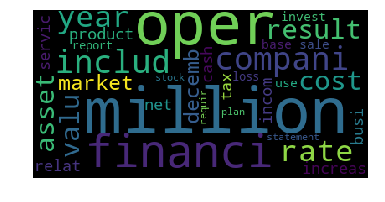

In [35]:
wordcloud.fit_words(dict_12)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()